<a href="https://colab.research.google.com/github/esther0402/NLP_Projects/blob/main/Binary_Classifier_Sarcasm_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to build a model that detects sarcasm in news headlines.

##Getting the data

In [4]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-12-29 04:54:40--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.207, 172.253.115.207, 172.253.122.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2023-12-29 04:54:40 (225 MB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [5]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as file:
    datastore = json.load(file)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

##Setting the Hyperparameters

In [6]:
training_size = 20000
vocab_size = 10000
max_length = 32
embedding_dim = 16

##Preprocessing the data
This code splits the dataset into training and testing data and labels.

In [7]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

This code aims to preprocess the text and labels for the model.

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

##Creating the model
This code tests the GlobalAveragePooling1D layer.

In [9]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


* The sample_array has the shape (1, 3, 2) - it's a 3D array with one sample, three time steps, and two features at each time step.
* The GlobalAveragePooling1D layer takes the average along the time dimension. In this case, for each feature, it calculates the average across the three time steps. The output will have shape (1, 2) because there is one sample, and the average is taken across the time dimension for each of the two features.
*The output array is a 2D array with one sample and two values. Each value represents the average of the corresponding feature across the three time steps in the original array. In this case, the first value (4) is the average of [10, 1, 1], and the second value (2) is the average of [2, 3, 1].

This code builds and compiles the model.

In [14]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

This code trains the model.

In [16]:
num_epochs = 30

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.5599 - accuracy: 0.7041 - val_loss: 0.3980 - val_accuracy: 0.8347 - 4s/epoch - 6ms/step
Epoch 2/30
625/625 - 2s - loss: 0.3110 - accuracy: 0.8755 - val_loss: 0.3518 - val_accuracy: 0.8436 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.2323 - accuracy: 0.9087 - val_loss: 0.3486 - val_accuracy: 0.8493 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.1865 - accuracy: 0.9293 - val_loss: 0.3645 - val_accuracy: 0.8547 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.1555 - accuracy: 0.9429 - val_loss: 0.3942 - val_accuracy: 0.8478 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 4s - loss: 0.1305 - accuracy: 0.9531 - val_loss: 0.4288 - val_accuracy: 0.8474 - 4s/epoch - 6ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1130 - accuracy: 0.9606 - val_loss: 0.4700 - val_accuracy: 0.8420 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.0958 - accuracy: 0.9675 - val_loss: 0.5221 - val_accuracy: 0.8348 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

##Visualizing the Results

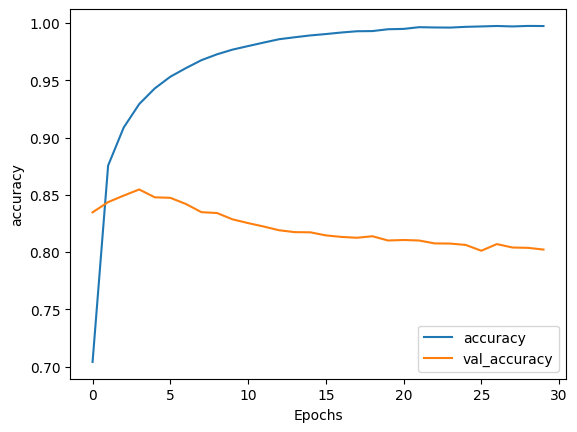

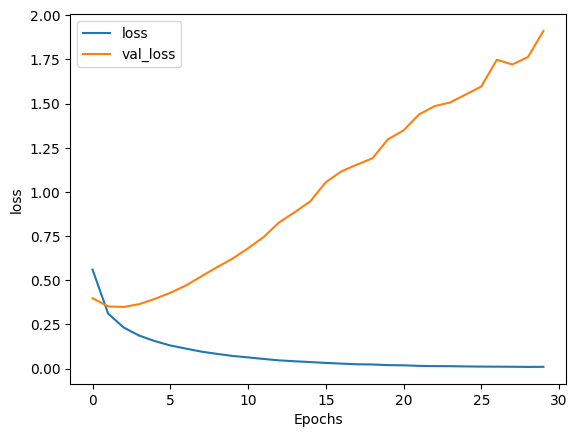

In [17]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")